<a href="https://colab.research.google.com/github/iypc-team/CoLab/blob/master/CV2_Utilities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 08/18/2021-1
from __future__ import absolute_import
from IPython.display import clear_output, display
import glob, os, shutil, sys
from os.path import *

try:
    from google.colab import drive, files
    from google.colab.patches import cv2_imshow
except Exception as err:
    pass

try: 
    from matplotlib import pyplot as plt
except Exception as err:
    %pip install matplotlib
    from matplotlib import pyplot as plt

try: 
    import cv2
    from cv2 import COLOR_BGR2RGBA
except Exception as err:
    print(err)
    %pip install opencv-python-headless # works.
    # %pip install opencv-contrib-python-headless
    import cv2
    from cv2 import COLOR_BGR2RGBA, IMREAD_UNCHANGED

import numpy as np

if exists('/content/sample_data'):
    shutil.rmtree('/content/sample_data')

contentPth = os.getcwd()
tensorflowImagesPath = join(contentPth, 'TensorflowImages')
resizedImagesPath = join(contentPth, 'TensorflowResizedImages')

if exists(resizedImagesPath):
    pass
    shutil.rmtree(resizedImagesPath)

try:
    drive.flush_and_unmount()
    drive.mount('/content/gdrive/', force_remount=True)
    mydrivePth = '/content/gdrive/MyDrive'
    os.chdir(mydrivePth)
    gdriveTFImagesPth = join(mydrivePth, 'TensorflowImages')
    gdriveResizedImagesPth = join(mydrivePth, 'TensorflowResizedImages')
    
    os.chdir(mydrivePth)
    from TarfileFunctions import *
    from BashColors import C
    
    if not exists(tensorflowImagesPath):
        shutil.copytree(gdriveTFImagesPth, tensorflowImagesPath)
        # tff.listTarfiles()
        os.chdir(contentPth)
        # tff.extractTarfiles('Juno_Original_Images.tar.gz')

    gdrive_resized_images = '/content/gdrive/MyDrive/TensorflowResizedImages'
    if not exists(resizedImagesPath):
        try: shutil.copytree(gdrive_resized_images, resizedImagesPath)
        except Exception as err:
            print(err)

    os.chdir(contentPth)

except Exception as err:
    # print(err)
    os.chdir(contentPth)
    from TarfileFunctions import *
    from BashColors import C
    tarfilePath=join(contentPth, 'Juno_Original_Images.tar.gz')
    if exists(tarfilePath) and not exists(tensorflowImagesPath):
        tff.extractTarfiles('Juno_Original_Images.tar.gz')

rootPth = expanduser("~")

os.chdir(contentPth)
print(f'cv2: {C.IBlue}{cv2.__version__}{C.ColorOff}')
print(f'cwd: {C.IBlue}{os.getcwd()}')

Mounted at /content/gdrive/
cv2: 4.1.2
cwd: /content


In [2]:
zeroPixel:np.ndarray
originalImageZeroPixel:np.ndarray

def matPlotShowSingleImage(thisImage):
    thisImage = cv2.cvtColor(thisImage, cv2.COLOR_BGR2RGBA)
    # pth = abspath(thisImage)
    # print(pth)
    fig=plt.figure()
    ax1=fig.add_subplot(1,1,1)
    ax1.imshow(thisImage)
    ax1.axis('off')
    pass

def matPlotCompareTwoImages(thisImage, compareImage):
    thisImage = cv2.cvtColor(thisImage, cv2.COLOR_BGR2RGBA)
    # thisPth = abspath(thisImage)
    # print(thisPth)
    compareImage = cv2.cvtColor(compareImage, cv2.COLOR_BGR2RGBA)
    # comparePth = abspath(compareImage)
    # print(comparePth)
    # Plot the images
    fig=plt.figure()
    ax1 = fig.add_subplot(1,2,1)
    ax1.imshow(thisImage)
    ax1.axis('off')
    ax1.set_title('Original Image')

    ax2 = fig.add_subplot(1,2,2)
    ax2.imshow(compareImage)
    ax2.axis('off')
    ax2.set_title('New Image')
    plt.show()

def cv2ResizeImage(thisImage, newSize=(224,224)):
    resized_image = cv2.resize(thisImage,newSize,interpolation=cv2.INTER_CUBIC)
    return resized_image

def cv2CreateImageWithColor(pxColor=[0,0,0,0], silent=True):
    '''return save_path'''
    bgImagePath = join(contentPth, 'TensorflowImages/backgroundImage224.png')
    bgImage = cv2.imread(bgImagePath, cv2.IMREAD_UNCHANGED)
    save_path = join(contentPth, 'bgImage.png')
    # print(save_path)
    bgImage = np.copy(bgImage)
    print(bgImage[0][0])

    for px in bgImage:
        bgImage[:] = pxColor
        cv2.waitKey(100)
        
    cv2.imwrite(save_path, bgImage)
    if not silent:
        print(f'shape: {bgImage.shape}')
        # cv2_imshow(bgImage)
        matPlotCompareTwoImages(bgImage, bgImage)
    return save_path

def cv2ZoomImage(thisImage, newScale=1, silent=True):
    '''return zoomImage'''
    zeroPixel = thisImage[0][0]
    angle = 0
    width, height, _ = thisImage.shape
    rotPoint = width//2, height //2
    dimentions = width, height
    rotPoint = width//2, height//2
    rotMatrix = cv2.getRotationMatrix2D(rotPoint, angle, scale=newScale)
    zoomImage = cv2.warpAffine(thisImage, rotMatrix, dimentions)
    if not silent:
        print('cv2ZoomImage()')
        matPlotCompareTwoImages(thisImage, zoomImage)
    return zoomImage

def cv2Rotation(thisImage, angle=0, rotPoint=None, newScale=1, silent=True):
    '''return rotImage'''
    thisImage = np.copy(thisImage)
    zeroPixel = thisImage[[0][0]]
    width, height, _ = thisImage.shape
    if rotPoint == None:
        rotPoint = width//2, height//2
        rotMat = cv2.getRotationMatrix2D(rotPoint, angle, scale=newScale)
        dimentions = width, height
        rotImage = cv2.warpAffine(thisImage, rotMat, dimentions)
        rotImageZeroPixel = rotImage[0][0]
        if not silent:
            print('cv2Rotation()')
            matPlotCompareTwoImages(thisImage, rotImage)
            cv2.waitKey(100)
        cv2.waitKey(100)
        cv2.destroyAllWindows()
        return rotImage

def cv2Translate(thisImage, x=0, y=0, silent=True):
    '''-x shift left -y shift up\nx shift right y shift down\n
    return newImage'''
    thisImage = np.copy(thisImage)
    zeroPixel=thisImage[0][0]
    translateMatrix = np.float32([[1,0,x],[0,1,y]])
    dimentions = (thisImage.shape[1], thisImage.shape[0])
    newImage = cv2.warpAffine(thisImage, translateMatrix, dimentions)

    if not silent:
        print('cv2Translate()')
        matPlotCompareTwoImages(thisImage, newImage)

    try:
        cv2.waitKey(100)
        cv2.destroyAllWindows()
    except: pass
    return newImage

def cv2EdgeDetection(thisImage, t1=50, t2=50, silent=True):
    '''return canny'''
    canny = cv2.Canny(thisImage, t1, t2)
    if not silent:
        matPlotCompareTwoImages(thisImage, canny)
    try:
        cv2.waitKey(100)
        cv2.destroyAllWindows()
    except: pass
    return canny

def changeBackgroundColors(path, image=None):
    '''returns newImg'''
    splitPath = split(path)
    filePath = splitPath[0]
    fileName = splitPath[1]
    fileName = 'new_' + fileName
    print(filePath)
    print(fileName)
    saveImagePath = join(contentPth, fileName)

    print(f'saveImagePath: {saveImagePath}')
    original_image = cv2.imread(path, cv2.IMREAD_UNCHANGED)
    originalZeroPixel = originalImage[0][0]
    plt.imshow(original_image)
    newImg = np.copy(original_image)

    zeroPixel = newImg[0][0]
    print('newImg zeroPixel:', zeroPixel)
    print('originalZeroPixel:', originalZeroPixel)

    width, height, channels = original_image.shape
    print(width, height, channels)

    for x in range(0, width):
        for y in range(0, height):
            channels_xy = newImg[y][x]
            # print(channels_xy)
            if all(channels_xy == zeroPixel):
                newImg[y][x] = originalZeroPixel
                
    cv2.imwrite(saveImagePath, newImg)
    newImg = cv2.imread(saveImagePath, -1)
    try:
        cv2.waitKey(100)
        cv2.destroyAllWindows()
    except: pass
    return newImg


In [3]:
import cv2
def cv2AddTwoImages(imagePath1, imagePath2):
    '''return  addImage'''
    # read two imagePaths
    src1 = cv2.imread(imagePath1)
    src2 = cv2.imread(imagePath2)
    try:
        # add or blend the imagePaths
        addImage = cv2.addWeighted(src1, 1, src2, 1, 0.0)
        # save the output imagePath
        # cv2.imwrite('image.png', dst)
        return addImage
    except Exception as err:
        print(f'{C.IRed}{err}')


[0 0 0 0]


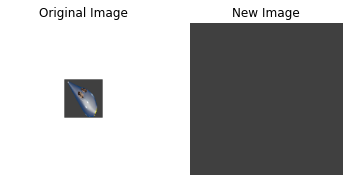

In [4]:

pth = join(tensorflowImagesPath, 'Enemy')
pth = join(pth, 'enemy_1.png')
shutil.copy2(pth, contentPth)

enemyPath = join(contentPth, 'enemy_1.png')
enemyImg = cv2.imread(enemyPath, cv2.IMREAD_UNCHANGED)
enemyImg = cv2ResizeImage(enemyImg)
enemyImg = cv2ZoomImage(enemyImg, newScale=0.25, silent=True)

imagePath = join(contentPth, 'zoom_enemy.png')
cv2.imwrite(imagePath, enemyImg)

try:
    cv2.waitKey(100)
    cv2.destroyAllWindows()
except: pass

bgImagePath = cv2CreateImageWithColor([64, 64, 64, 255])
bgImage = cv2.imread(bgImagePath, cv2.IMREAD_UNCHANGED)

try: cv2_imshow()
except: matPlotCompareTwoImages(enemyImg, bgImage)

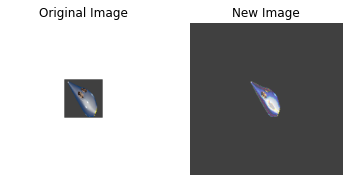

(224, 224)


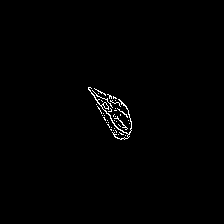

In [5]:
img1 = cv2.imread('zoom_enemy.png', cv2.IMREAD_UNCHANGED)
img2 = cv2.imread(bgImagePath, cv2.IMREAD_UNCHANGED)
bitwiseAnd = cv2.bitwise_or(img1, img2)
matPlotCompareTwoImages(img1, bitwiseAnd)

edgeImg=cv2EdgeDetection(bitwiseAnd)
print(edgeImg.shape)
cv2_imshow(edgeImg)

In [6]:
# Read Image
img = cv2.imread(enemyPath)
# Create Mask
mask = np.zeros(img.shape[:2], np.uint8)
# Create zero-filled foreground and background
bgdModel = np.zeros((1,65),np.uint8)
fgdModel = np.zeros((1,65),np.uint8)

# Define a crop image rectangle size
rect = (0,img.shape[0],img.shape[1])
# GrabCut algorithm specifying the empty models and mask
cv2.grabCut(img, mask, rect, bgdModel, fgdModel,5, cv2.GC_INIT_WITH_RECT)
# The values, 0 and 2, will be converted into zeros, and 1-3 into ones, and stored into mask2
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]
# Store image as Grabcut.jpg
cv2.imwrite("fill_enemy.png", img)

TypeError: ignored